In [1]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[]


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data=pd.read_csv("DATA.csv")
data


,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,P0,NaN,False,True,True,True,False,True,False,False,Negative
1,P1,Fever,True,False,True,True,False,False,True,False,Positive
2,P2,Fever,False,True,True,False,False,False,True,False,Positive
3,P3,NaN,True,False,False,False,True,True,True,False,Positive
4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive
...,...,...,...,...,...,...,...,...,...,...,...
24995,P24995,NaN,True,True,False,True,True,False,False,True,Positive
24996,P24996,Fever,False,True,True,False,True,True,True,True,Positive
24997,P24997,NaN,True,True,False,False,True,True,False,False,Positive
24998,P24998,Swollen Lymph Nodes,False,True,False,True,True,True,False,False,Negative


In [2]:
print(data.isnull().sum())

Patient_ID                           0
Systemic Illness                  6216
Rectal Pain                          0
Sore Throat                          0
Penile Oedema                        0
Oral Lesions                         0
Solitary Lesion                      0
Swollen Tonsils                      0
HIV Infection                        0
Sexually Transmitted Infection       0
MonkeyPox                            0
dtype: int64


In [3]:
# DISTRIBUTION  OF Positive cases and negative cases 
print(data['MonkeyPox'].value_counts())
print()

print('Percentage of No Positive cases: {}%'.format(round(data.MonkeyPox.value_counts()['Positive']/len(data) * 100.0,2)))
print('Percentage of Negative cases: {}%'.format(round(data.MonkeyPox.value_counts()['Negative']/len(data) * 100.0,2)))

MonkeyPox
Positive    15909
Negative     9091
Name: count, dtype: int64

Percentage of No Positive cases: 63.64%
Percentage of Negative cases: 36.36%


In [4]:
#Unique values present in every column  
for col in data.columns:
    unique_values=data[col].unique()
    print(f"UNIQUE VALUES IN A COLUMN'{col}':{unique_values}'")
    print()


UNIQUE VALUES IN A COLUMN'Patient_ID':['P0' 'P1' 'P2' ... 'P24997' 'P24998' 'P24999']'

UNIQUE VALUES IN A COLUMN'Systemic Illness':[nan 'Fever' 'Swollen Lymph Nodes' 'Muscle Aches and Pain']'

UNIQUE VALUES IN A COLUMN'Rectal Pain':[False  True]'

UNIQUE VALUES IN A COLUMN'Sore Throat':[ True False]'

UNIQUE VALUES IN A COLUMN'Penile Oedema':[ True False]'

UNIQUE VALUES IN A COLUMN'Oral Lesions':[ True False]'

UNIQUE VALUES IN A COLUMN'Solitary Lesion':[False  True]'

UNIQUE VALUES IN A COLUMN'Swollen Tonsils':[ True False]'

UNIQUE VALUES IN A COLUMN'HIV Infection':[False  True]'

UNIQUE VALUES IN A COLUMN'Sexually Transmitted Infection':[False  True]'

UNIQUE VALUES IN A COLUMN'MonkeyPox':['Negative' 'Positive']'



In [5]:
#Converting the text into numerical of all the columns 
features=["Rectal Pain","Sore Throat","Penile Oedema","Oral Lesions","Solitary Lesion","Swollen Tonsils","HIV Infection","Sexually Transmitted Infection"]
for col in features:
    data[col]=data[col].replace({True:1,False:0})

C:\Users\pulip\AppData\Local\Temp\ipykernel_8836\270484086.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col]=data[col].replace({True:1,False:0})


In [6]:
data['MonkeyPox']=data['MonkeyPox'].replace({'Negative':0,'Positive':1})

C:\Users\pulip\AppData\Local\Temp\ipykernel_8836\2458704213.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['MonkeyPox']=data['MonkeyPox'].replace({'Negative':0,'Positive':1})


In [7]:
import pandas as pd

# Fill missing values with a specific value
data['Systemic Illness'].fillna('Unknown', inplace=True)

# Perform one-hot encoding
data = pd.get_dummies(data, columns=['Systemic Illness'])

# Print the first few rows of the preprocessed data
print(data.head())

  Patient_ID  Rectal Pain  Sore Throat  Penile Oedema  Oral Lesions  \
0         P0            0            1              1             1   
1         P1            1            0              1             1   
2         P2            0            1              1             0   
3         P3            1            0              0             0   
4         P4            1            1              1             0   

   Solitary Lesion  Swollen Tonsils  HIV Infection  \
0                0                1              0   
1                0                0              1   
2                0                0              1   
3                1                1              1   
4                0                1              1   

   Sexually Transmitted Infection  MonkeyPox  Systemic Illness_Fever  \
0                               0          0                   False   
1                               0          1                    True   
2                               

C:\Users\pulip\AppData\Local\Temp\ipykernel_8836\1155651068.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Systemic Illness'].fillna('Unknown', inplace=True)


In [8]:
#Converting the text into numerical of all the columns 
features=["Systemic Illness_Fever","Systemic Illness_Muscle Aches and Pain", "Systemic Illness_Swollen Lymph Nodes","Systemic Illness_Unknown"]
for col in features:
    data[col]=data[col].replace({True:1,False:0})

C:\Users\pulip\AppData\Local\Temp\ipykernel_8836\3163387298.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col]=data[col].replace({True:1,False:0})


In [9]:
data['Patient_ID'] = data['Patient_ID'].str.replace('P','', regex=False).astype(int)

In [10]:
data

,Patient_ID,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox,Systemic Illness_Fever,Systemic Illness_Muscle Aches and Pain,Systemic Illness_Swollen Lymph Nodes,Systemic Illness_Unknown
0,0,0,1,1,1,0,1,0,0,0,0,0,0,1
1,1,1,0,1,1,0,0,1,0,1,1,0,0,0
2,2,0,1,1,0,0,0,1,0,1,1,0,0,0
3,3,1,0,0,0,1,1,1,0,1,0,0,0,1
4,4,1,1,1,0,0,1,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,24995,1,1,0,1,1,0,0,1,1,0,0,0,1
24996,24996,0,1,1,0,1,1,1,1,1,1,0,0,0
24997,24997,1,1,0,0,1,1,0,0,1,0,0,0,1
24998,24998,0,1,0,1,1,1,0,0,0,0,0,1,0


In [11]:
print(data.dtypes)

Patient_ID                                int32
Rectal Pain                               int64
Sore Throat                               int64
Penile Oedema                             int64
Oral Lesions                              int64
Solitary Lesion                           int64
Swollen Tonsils                           int64
HIV Infection                             int64
Sexually Transmitted Infection            int64
MonkeyPox                                 int64
Systemic Illness_Fever                    int64
Systemic Illness_Muscle Aches and Pain    int64
Systemic Illness_Swollen Lymph Nodes      int64
Systemic Illness_Unknown                  int64
dtype: object


In [12]:
print(data.columns)
print("Total Number of Columns :",len(data.columns))

Index(['Patient_ID', 'Rectal Pain', 'Sore Throat', 'Penile Oedema',
       'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils', 'HIV Infection',
       'Sexually Transmitted Infection', 'MonkeyPox', 'Systemic Illness_Fever',
       'Systemic Illness_Muscle Aches and Pain',
       'Systemic Illness_Swollen Lymph Nodes', 'Systemic Illness_Unknown'],
      dtype='object')
Total Number of Columns : 14


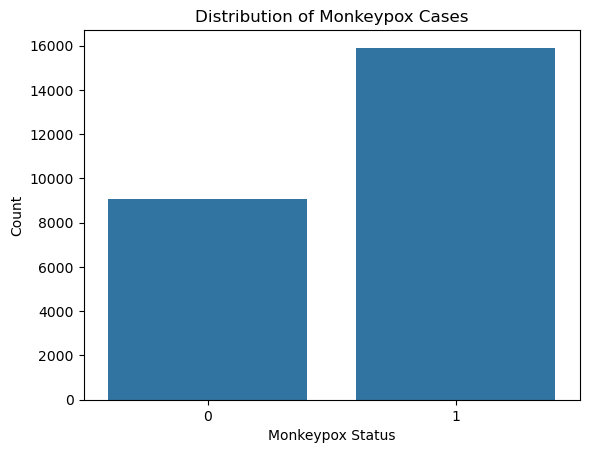

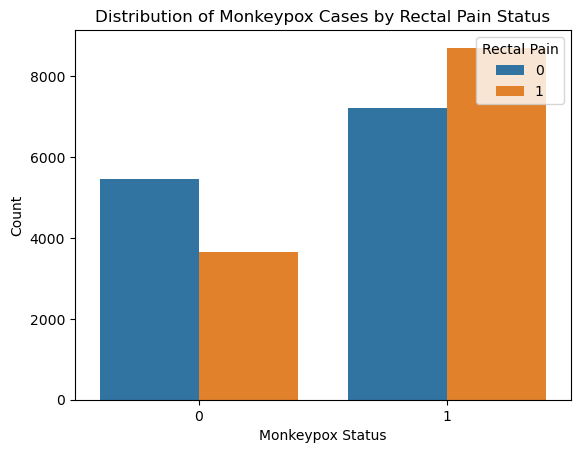

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Visualizing the distribution of positive and negative cases
sns.countplot(x='MonkeyPox', data=data)
plt.title('Distribution of Monkeypox Cases')
plt.xlabel('Monkeypox Status')
plt.ylabel('Count')
plt.show()

sns.countplot(x='MonkeyPox', hue='Rectal Pain', data=data)
plt.title('Distribution of Monkeypox Cases by Rectal Pain Status')
plt.xlabel('Monkeypox Status')
plt.ylabel('Count')
plt.legend(title='Rectal Pain', loc='upper right')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.drop(['MonkeyPox', 'Patient_ID'], axis=1) 
y = data['MonkeyPox'] 

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Applying ANN to All Features for a Baseline

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming X contains your features and y contains the target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", accuracy)

Epoch 1/10
500/500 [==============================] - 4s 6ms/step - loss: 0.6104 - accuracy: 0.6726 - val_loss: 0.5856 - val_accuracy: 0.7055
Epoch 2/10
500/500 [==============================] - 2s 5ms/step - loss: 0.5979 - accuracy: 0.6862 - val_loss: 0.5912 - val_accuracy: 0.6985
Epoch 3/10
500/500 [==============================] - 2s 5ms/step - loss: 0.5961 - accuracy: 0.6845 - val_loss: 0.5860 - val_accuracy: 0.7038
Epoch 4/10
500/500 [==============================] - 3s 6ms/step - loss: 0.5946 - accuracy: 0.6869 - val_loss: 0.5859 - val_accuracy: 0.7070
Epoch 5/10
500/500 [==============================] - 3s 5ms/step - loss: 0.5937 - accuracy: 0.6862 - val_loss: 0.5866 - val_accuracy: 0.7020
Epoch 6/10
500/500 [==============================] - 2s 5ms/step - loss: 0.5929 - accuracy: 0.6871 - val_loss: 0.5862 - val_accuracy: 0.7030
Epoch 7/10
500/500 [==============================] - 2s 5ms/step - loss: 0.5922 - accuracy: 0.6888 - val_loss: 0.5874 - val_accuracy: 0.6952
Epoch 

APPLYING  FOR ALL 

In [16]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target variable
X = data.drop(['MonkeyPox', 'Patient_ID'], axis=1)  # Features
y = data['MonkeyPox']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features (optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the ANN model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    keras.layers.Dense(64, activation='relu'),                                    # Hidden layer
    keras.layers.Dense(1, activation='sigmoid')                                  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.2f}')

Epoch 1/50
500/500 [==============================] - 5s 8ms/step - loss: 0.6060 - accuracy: 0.6769 - val_loss: 0.5887 - val_accuracy: 0.6945
Epoch 2/50
500/500 [==============================] - 3s 7ms/step - loss: 0.5982 - accuracy: 0.6841 - val_loss: 0.5858 - val_accuracy: 0.7040
Epoch 3/50
500/500 [==============================] - 3s 6ms/step - loss: 0.5965 - accuracy: 0.6859 - val_loss: 0.5904 - val_accuracy: 0.7010
Epoch 4/50
500/500 [==============================] - 3s 7ms/step - loss: 0.5955 - accuracy: 0.6874 - val_loss: 0.5875 - val_accuracy: 0.6992
Epoch 5/50
500/500 [==============================] - 3s 6ms/step - loss: 0.5943 - accuracy: 0.6845 - val_loss: 0.5882 - val_accuracy: 0.6988
Epoch 6/50
500/500 [==============================] - 3s 6ms/step - loss: 0.5930 - accuracy: 0.6874 - val_loss: 0.5871 - val_accuracy: 0.7015
Epoch 7/50
500/500 [==============================] - 3s 7ms/step - loss: 0.5921 - accuracy: 0.6888 - val_loss: 0.5888 - val_accuracy: 0.7038
Epoch 

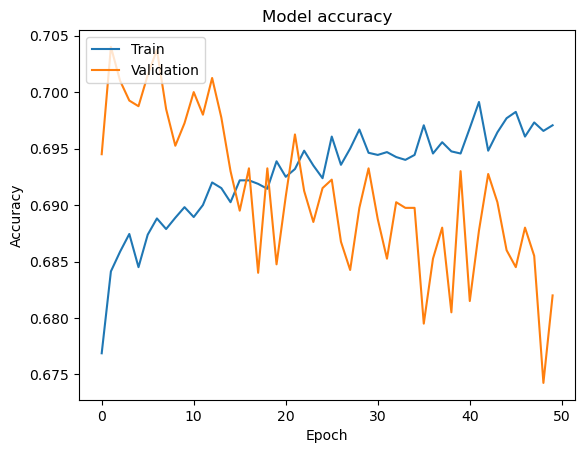

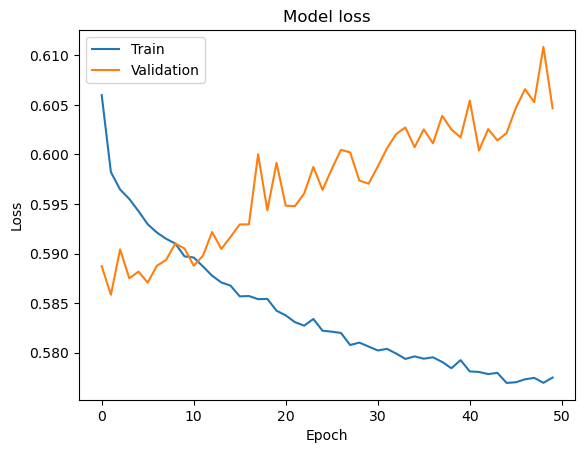

In [17]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target variable
X = data.drop(['MonkeyPox'], axis=1)  # Features
y = data['MonkeyPox']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features (optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the ANN model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    keras.layers.Dense(64, activation='relu'),                                    # Hidden layer
    keras.layers.Dense(1, activation='sigmoid')                                  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.2f}')

Epoch 1/50
500/500 [==============================] - 5s 7ms/step - loss: 0.6064 - accuracy: 0.6792 - val_loss: 0.5872 - val_accuracy: 0.7025
Epoch 2/50
500/500 [==============================] - 3s 6ms/step - loss: 0.5974 - accuracy: 0.6846 - val_loss: 0.5933 - val_accuracy: 0.6960
Epoch 3/50
500/500 [==============================] - 3s 6ms/step - loss: 0.5954 - accuracy: 0.6870 - val_loss: 0.5890 - val_accuracy: 0.6970
Epoch 4/50
500/500 [==============================] - 3s 7ms/step - loss: 0.5936 - accuracy: 0.6879 - val_loss: 0.5916 - val_accuracy: 0.6970
Epoch 5/50
500/500 [==============================] - 3s 7ms/step - loss: 0.5930 - accuracy: 0.6890 - val_loss: 0.5880 - val_accuracy: 0.7020
Epoch 6/50
500/500 [==============================] - 3s 7ms/step - loss: 0.5915 - accuracy: 0.6907 - val_loss: 0.5912 - val_accuracy: 0.6975
Epoch 7/50
500/500 [==============================] - 3s 6ms/step - loss: 0.5904 - accuracy: 0.6892 - val_loss: 0.5912 - val_accuracy: 0.6982
Epoch 

ALONG  WITH INPUT LAYER 

# CODE FOR  BASE LINE WITH ALL SCORES

In [14]:

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Assuming your data is already preprocessed and stored in 'data'

# Define features and target variable
X = data.drop(['MonkeyPox'], axis=1)  # Features (11 features)
y = data['MonkeyPox']  # Target variable (0 for Negative, 1 for Positive)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features (optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the ANN model with an explicit input layer
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),  # Explicit input layer with number of features
    keras.layers.Dense(128, activation='relu'),       # First hidden layer with 128 neurons
    keras.layers.Dense(64, activation='relu'),        # Second hidden layer with 64 neurons
    keras.layers.Dense(1, activation='sigmoid')       # Output layer for binary classification
])  
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
y_pred_prob = model.predict(X_test).flatten()  # Get predicted probabilities
y_pred = (y_pred_prob > 0.5).astype(int)       # Convert probabilities to binary predictions

# Calculate performance metrics
classification_rep = classification_report(y_test, y_pred, output_dict=True)
auc_roc = roc_auc_score(y_test, y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)
TN = conf_matrix[0][0]  # True Negatives
FP = conf_matrix[0][1]  # False Positives

specificity = TN / (TN + FP) if (TN + FP) > 0 else 0  # Specificity calculation

# Print all results at once
print("\n--- Performance Metrics ---")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Precision: {classification_rep['1']['precision'] * 100:.2f}%")
print(f"Recall: {classification_rep['1']['recall'] * 100:.2f}%")
print(f"F1 Score: {classification_rep['1']['f1-score'] * 100:.2f}%")
print(f"AUC-ROC: {auc_roc * 100:.2f}%")
print(f"Specificity: {specificity * 100:.2f}%")

# Display confusion matrix
print("\n--- Confusion Matrix ---")
print(conf_matrix)


Epoch 1/50
500/500 [==============================] - 2s 3ms/step - loss: 0.6082 - accuracy: 0.6754 - val_loss: 0.5855 - val_accuracy: 0.7038
Epoch 2/50
500/500 [==============================] - 1s 2ms/step - loss: 0.5991 - accuracy: 0.6839 - val_loss: 0.5888 - val_accuracy: 0.7015
Epoch 3/50
500/500 [==============================] - 1s 2ms/step - loss: 0.5956 - accuracy: 0.6876 - val_loss: 0.5898 - val_accuracy: 0.7035
Epoch 4/50
500/500 [==============================] - 1s 2ms/step - loss: 0.5935 - accuracy: 0.6888 - val_loss: 0.5871 - val_accuracy: 0.7070
Epoch 5/50
500/500 [==============================] - 1s 2ms/step - loss: 0.5925 - accuracy: 0.6882 - val_loss: 0.5875 - val_accuracy: 0.7042
Epoch 6/50
500/500 [==============================] - 1s 2ms/step - loss: 0.5908 - accuracy: 0.6889 - val_loss: 0.5886 - val_accuracy: 0.7032
Epoch 7/50
500/500 [==============================] - 1s 2ms/step - loss: 0.5894 - accuracy: 0.6919 - val_loss: 0.5926 - val_accuracy: 0.7000
Epoch 

Complete Code for Hyperparameter Tuning with Keras Tuner 

# CHECKING  FOR 1 TO 7 HIDDEN LAYERS AND WITH VARIOUS NO OF NEURONS

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix)

# Load your data
# Assuming 'data' is your DataFrame and 'MonkeyPox' is the target variable
X = data.drop(['MonkeyPox'], axis=1)  # Features
y = data['MonkeyPox']  # Target variable (0 for Negative, 1 for Positive)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model builder function for Keras Tuner
def model_builder(hp):
    model = keras.Sequential()
    
    # Tune the number of hidden layers (1 to 7)
    for i in range(hp.Int('num_layers', 1, 7)):
        # Tune the number of units in each layer (16 to 256)
        model.add(keras.layers.Dense(units=hp.Int('units_' + str(i), min_value=16, max_value=256, step=16),
                                      activation='relu'))
    
    model.add(keras.layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification
    
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Instantiate the Keras Tuner
tuner = kt.Hyperband(
    model_builder,
    objective='val_accuracy',
    max_epochs=50,
    factor=3,
    directory='my_dir',
    project_name='hyperparameter_tuning'
)

# Run the hyperparameter search
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tuner.search(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete.
The optimal number of layers is {best_hps.get('num_layers')}.
The optimal number of units in each layer is:
""")
for i in range(best_hps.get('num_layers')):
    print(f"Layer {i + 1}: {best_hps.get('units_' + str(i))} units")

# Build the best model using the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Train the best model on the full training data
best_model.fit(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

# Evaluate the best model on the test set
y_pred = (best_model.predict(X_test) > 0.5).astype("int32")  # Threshold at 0.5
y_pred_proba = best_model.predict(X_test)[:, 0]

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Calculate confusion matrix for specificity calculation
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Print performance metrics
print("\nPerformance Metrics:")
print(f"Accuracy: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1 Score: {f1:.2%}")
print(f"AUC-ROC Score: {roc_auc:.2%}")
print(f"Specificity: {specificity:.2%}")

# Print the architecture of the best model
print("\nBest Model Architecture:")
best_model.summary()


In [39]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Define features and target variable
X = data.drop(['MonkeyPox'], axis=1)  # Features (10 features)
y = data['MonkeyPox']  # Target variable (0 for Negative, 1 for Positive)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features (optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model builder function for Keras Tuner
def model_builder(hp):
    model = keras.Sequential()
    
    # Tune the number of hidden layers (1 to 5)
    for i in range(hp.Int('num_layers', 1, 5)):  # Allow up to 5 hidden layers
        # Tune the number of units in each layer (16 to 256)
        model.add(keras.layers.Dense(units=hp.Int('units_' + str(i), min_value=16, max_value=256, step=16),
                                      activation='relu'))
    
    model.add(keras.layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification
    
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Instantiate the Keras Tuner
tuner = kt.Hyperband(
    model_builder,
    objective='val_accuracy',
    max_epochs=50,
    factor=3,
    directory='my_dir',
    project_name='hyperparameter_tuning'
)

# Run the hyperparameter search
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tuner.search(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete.
The optimal number of layers is {best_hps.get('num_layers')}.
The optimal number of units in each layer is:
""")
for i in range(best_hps.get('num_layers')):
    print(f"Layer {i + 1}: {best_hps.get('units_' + str(i))} units")

Reloading Tuner from my_dir\hyperparameter_tuning\tuner0.json

The hyperparameter search is complete.
The optimal number of layers is 3.
The optimal number of units in each layer is:

Layer 1: 64 units
Layer 2: 32 units
Layer 3: 32 units


# Best ANN

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner import HyperModel, RandomSearch

# Load your data
# Assuming 'data' is your DataFrame and 'MonkeyPox' is the target variable
X = data.drop('MonkeyPox', axis=1)  # Features
y = data['MonkeyPox']                # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a hypermodel class
class ANNHyperModel(HyperModel):
    def build(self, hp):
        model = keras.Sequential()
        # Input Layer
        model.add(layers.Input(shape=(X_train_scaled.shape[1],)))
        
        # Adding hidden layers
        for i in range(hp.Int('num_hidden_layers', 1, 7)):
            model.add(layers.Dense(units=hp.Int(f'num_neurons_{i}', 8, 128, step=8),
                                   activation='relu'))

        # Output Layer
        model.add(layers.Dense(1, activation='sigmoid'))  # For binary classification
        
        # Compile the model
        model.compile(optimizer=keras.optimizers.Adam(
            hp.Float('learning_rate', 1e-4, 1e-2, sampling='LOG')),
            loss='binary_crossentropy',
            metrics=['accuracy'])
        
        return model

# Create a hypermodel instance
hypermodel = ANNHyperModel()

# Create a RandomSearch tuner
tuner = RandomSearch(
    hypermodel,
    objective='val_accuracy',
    max_trials=20,  # You can increase this to explore more combinations
    executions_per_trial=1,
    directory='ann_tuner',
    project_name='ann_tuning'
)

# Run the hyperparameter search
tuner.search(X_train_scaled, y_train, 
             validation_split=0.2,
             epochs=50,  # Number of epochs for training
             batch_size=32)

# Get the best model and its hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print("Best Hyperparameters:")
print(f"Number of Hidden Layers: {best_hyperparameters.get('num_hidden_layers')}")
for i in range(best_hyperparameters.get('num_hidden_layers')):
    print(f"Neurons in Layer {i + 1}: {best_hyperparameters.get(f'num_neurons_{i}')}")
print(f"Learning Rate: {best_hyperparameters.get('learning_rate')}")

# Evaluate the best model on the test set
test_loss, test_accuracy = best_model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy:.2%}")


C:\Users\pulip\AppData\Local\Temp\ipykernel_38452\3267673935.py:7: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import HyperModel, RandomSearch


Reloading Tuner from ann_tuner\ann_tuning\tuner0.json
Best Hyperparameters:
Number of Hidden Layers: 3
Neurons in Layer 1: 24
Neurons in Layer 2: 16
Neurons in Layer 3: 8
Learning Rate: 0.001190787906908991
157/157 [==============================] - 0s 2ms/step - loss: 0.5881 - accuracy: 0.7034
Test Accuracy: 70.34%


In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix)
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner import HyperModel, RandomSearch

# Load your data
# Assuming 'data' is your DataFrame and 'MonkeyPox' is the target variable
X = data.drop('MonkeyPox', axis=1)  # Features
y = data['MonkeyPox']                # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a hypermodel class
class ANNHyperModel(HyperModel):
    def build(self, hp):
        model = keras.Sequential()
        # Input Layer
        model.add(layers.Input(shape=(X_train_scaled.shape[1],)))
        
        # Adding hidden layers
        for i in range(hp.Int('num_hidden_layers', 1, 7)):
            model.add(layers.Dense(units=hp.Int(f'num_neurons_{i}', 8, 128, step=8),
                                   activation='relu'))

        # Output Layer
        model.add(layers.Dense(1, activation='sigmoid'))  # For binary classification
        
        # Compile the model
        model.compile(optimizer=keras.optimizers.Adam(
            hp.Float('learning_rate', 1e-4, 1e-2, sampling='LOG')),
            loss='binary_crossentropy',
            metrics=['accuracy'])
        
        return model

# Create a hypermodel instance
hypermodel = ANNHyperModel()

# Create a RandomSearch tuner
tuner = RandomSearch(
    hypermodel,
    objective='val_accuracy',
    max_trials=20,  # You can increase this to explore more combinations
    executions_per_trial=1,
    directory='ann_tuner',
    project_name='ann_tuning'
)

# Run the hyperparameter search
tuner.search(X_train_scaled, y_train, 
             validation_split=0.2,
             epochs=50,  # Number of epochs for training
             batch_size=32)

# Get the best model and its hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print("Best Hyperparameters:")
print(f"Number of Hidden Layers: {best_hyperparameters.get('num_hidden_layers')}")
for i in range(best_hyperparameters.get('num_hidden_layers')):
    print(f"Neurons in Layer {i + 1}: {best_hyperparameters.get(f'num_neurons_{i}')}")
print(f"Learning Rate: {best_hyperparameters.get('learning_rate')}")

# Evaluate the best model on the test set
test_loss, test_accuracy = best_model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy:.2%}")

# Make predictions
y_pred = (best_model.predict(X_test_scaled) > 0.5).astype("int32")  # Threshold at 0.5
y_pred_proba = best_model.predict(X_test_scaled)[:, 0]

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Calculate confusion matrix for specificity calculation
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Print performance metrics
print(f"Accuracy: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1 Score: {f1:.2%}")
print(f"AUC-ROC Score: {roc_auc:.2%}")
print(f"Specificity: {specificity:.2%}")

# Print the architecture of the best model
print("\nBest Model Architecture:")
best_model.summary()

# Get the specific number of hidden layers and their respective neurons
num_hidden_layers = best_hyperparameters.get('num_hidden_layers')
neurons_per_layer = [best_hyperparameters.get(f'num_neurons_{i}') for i in range(num_hidden_layers)]

print("\nNumber of Hidden Layers:", num_hidden_layers)
print("Neurons in each Hidden Layer:", neurons_per_layer)


Reloading Tuner from ann_tuner\ann_tuning\tuner0.json
Best Hyperparameters:
Number of Hidden Layers: 6
Neurons in Layer 1: 112
Neurons in Layer 2: 8
Neurons in Layer 3: 8
Neurons in Layer 4: 8
Neurons in Layer 5: 8
Neurons in Layer 6: 8
Learning Rate: 0.0005579877919933368
157/157 [==============================] - 0s 957us/step - loss: 0.5853 - accuracy: 0.6990
Test Accuracy: 69.90%
157/157 [==============================] - 0s 953us/step
Accuracy: 69.90%
Precision: 70.90%
Recall: 90.97%
F1 Score: 79.69%
AUC-ROC Score: 69.97%
Specificity: 30.90%

Best Model Architecture:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 112)               1568      
                                                                 
 dense_1 (Dense)             (None, 8)                 904       
                                                                 
 dens

# Feature Selection For ANN

In [18]:
# Step 1: Install necessary libraries (if not already installed)
# !pip install keras-tuner scikit-learn tensorflow

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from keras_tuner import RandomSearch

# Assuming 'target' is the target variable and the rest are features
X = data.drop('MonkeyPox', axis=1)  # Features
y = data['MonkeyPox']               # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a Random Forest model to compute Permutation Importance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the baseline model performance
baseline_score = rf_model.score(X_test, y_test)
print(f'Baseline accuracy: {baseline_score}')

# Step 4: Apply Permutation Importance to identify important features
perm_importance = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=42)

# Get feature importance values
feature_importance = perm_importance.importances_mean
feature_names = X.columns

# Sort features by importance
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_features = feature_names[sorted_idx]

# Select top N features (e.g., top 10)
top_n = 10
important_features = sorted_features[:top_n]
print("Selected Important Features:", important_features)

# Step 5: Subset data based on the selected features
X_train_selected = X_train[important_features]
X_test_selected = X_test[important_features]

# Normalize the features (scaling the selected features)
scaler = StandardScaler()
X_train_selected = scaler.fit_transform(X_train_selected)
X_test_selected = scaler.transform(X_test_selected)

# Step 6: Define the model-building function for Keras Tuner
def build_model(hp):
    model = keras.Sequential()
    
    # Tune the number of layers (between 1 and 3)
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(keras.layers.Dense(
            units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
            activation='relu'
        ))
    
    # Add a dropout layer to prevent overfitting
    model.add(keras.layers.Dropout(rate=hp.Float('dropout', 0.0, 0.5, step=0.1)))

    # Output layer for binary classification
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
        ),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Step 7: Set up Keras Tuner with RandomSearch
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Number of model architectures to try
    executions_per_trial=2,  # Run each model twice for stability
    directory='my_dir',
    project_name='ann_with_permutation_importance'
)

# Step 8: Train the models using Keras Tuner
tuner.search(X_train_selected, y_train, epochs=10, validation_data=(X_test_selected, y_test))

# Step 9: Retrieve the best model and evaluate it on the test set
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model on the test set
loss, accuracy = best_model.evaluate(X_test_selected, y_test)
print(f"Test accuracy with selected features: {accuracy}")

# Optionally, print the summary of the best model architecture
best_model.summary()


Trial 10 Complete [00h 00m 49s]
val_accuracy: 0.6848000288009644

Best val_accuracy So Far: 0.6872999966144562
Total elapsed time: 00h 06m 44s
157/157 [==============================] - 1s 2ms/step - loss: 0.6050 - accuracy: 0.6876
Test accuracy with selected features: 0.6876000165939331
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 480)               5280      
                                                                 
 dense_1 (Dense)             (None, 480)               230880    
                                                                 
 dense_2 (Dense)             (None, 352)               169312    
                                                                 
 dropout (Dropout)           (None, 352)               0         
                                                                 
 dense_3 (Dense)             (N

# Increase  the  epoches (from 100 to 200)